<a href="https://colab.research.google.com/github/DatumLearning/Faster_RCNN_Opencv/blob/main/opencv_faster_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/DatumLearning/Faster_RCNN_Opencv.git

Cloning into 'Faster_RCNN_Opencv'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 8
Unpacking objects: 100% (11/11), 56.70 MiB | 10.69 MiB/s, done.


In [28]:
import numpy as np
import random
import time
import cv2
import os
import matplotlib.pyplot as plt

In [29]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [30]:
weightsPath = "frozen_inference_graph.pb"
configPath = "mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"

In [31]:
net = cv2.dnn.readNetFromTensorflow(weightsPath, configPath)

In [108]:
image = cv2.imread("p&books.jpg")
(H, W) = image.shape[:2]

In [109]:
blob = cv2.dnn.blobFromImage(image, swapRB=True, crop=False)

In [110]:
net.setInput(blob)

In [111]:
boxes = net.forward(["detection_out_final"])

In [112]:
output = boxes[0].squeeze()

In [113]:
output

array([[0.        , 0.        , 0.919757  , 0.3137394 , 0.20897838,
        0.70236874, 0.89336324],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0. 

In [114]:
output[: , 2][:5] , output[: , 1][:5]

(array([0.919757, 0.      , 0.      , 0.      , 0.      ], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32))

In [115]:
output[: , 3:][:5]

array([[0.3137394 , 0.20897838, 0.70236874, 0.89336324],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]], dtype=float32)

In [120]:
num = np.argwhere(output[: , 2] > 0.8).shape[0]

In [121]:
font = cv2.FONT_HERSHEY_DUPLEX

In [122]:
img = cv2.imread("p&books.jpg")
for i in range(num):
  x1n , y1n , x2n , y2n = output[i , 3:]
  x1 = int(x1n * W)
  y1 = int(y1n * H)
  x2 = int(x2n * W)
  y2 = int(y2n * H)
  img = cv2.rectangle(img , (x1 , y1) , (x2 , y2) , (0 , 255 , 0) , 3)
  class_name = coco_names[int(output[i , 1])]
  img = cv2.putText(img , class_name , (x1 , y1 - 10) , font , 0.5 , 
                    (255 , 0 , 0) , 1 , cv2.LINE_AA)

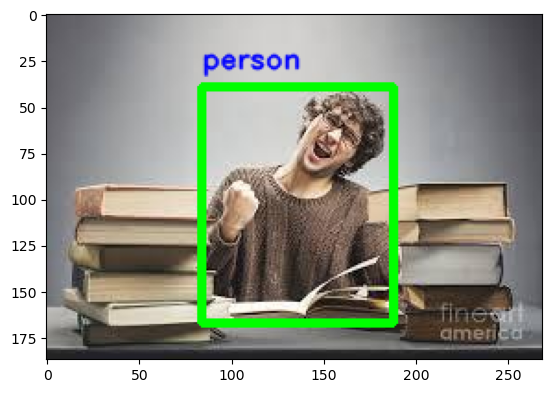

In [123]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()
